Use case:  As a user I want to view which files in a dataset cover the earth on a certian day.

In [1]:
import netCDF4
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import datetime
from urllib.error import HTTPError
from datetime import timedelta, date, datetime
from mpl_toolkits.basemap import Basemap
from ipywidgets import interact
import ipywidgets as widgets

We'll keep some constants to help us run through the various datasets that we'll be requesting.

In [2]:
SMAP_DATASET_URL = "http://n5eil01u.ecs.nsidc.org:80/opendap/SMAP/SPL3SMP.003/"
SMAP_DATEFILE_URL = "/SMAP_L3_SM_P_{}_R13080_001.h5.nc"
TIMEFRAME = [datetime(2015, 4, 1), datetime(2016, 6, 1)]
VARIABLES = ("?Soil_Moisture_Retrieval_Data_soil_moisture[0:1:405][0:1:963],"
             "Soil_Moisture_Retrieval_Data_latitude[0:1:405][0:1:963],"
             "Soil_Moisture_Retrieval_Data_longitude[0:1:405][0:1:963]")


Here are some syntactic sugar methods to keep the main method readable.

In [3]:
def form_smashed_date(date):
    return str(date.year) + str(date.month).zfill(2) + str(date.day).zfill(2)
        
def form_dotted_date(date):
    return str(date.year) + "." + str(date.month).zfill(2) + "." + str(date.day).zfill(2)


In [4]:
def show_covered_area(dataset):
    lat = dataset.variables["Soil_Moisture_Retrieval_Data_latitude"][:, :]
    lon = dataset.variables["Soil_Moisture_Retrieval_Data_longitude"][:, :]
    mos = dataset.variables["Soil_Moisture_Retrieval_Data_soil_moisture"][:, :]
    plot = plt.figure(figsize=(20,20))
    m = Basemap(projection='robin',lon_0=0,resolution='c')
    m.drawcoastlines()
    m.pcolor(lon, lat, mos, latlon=True)


Finally, our main method which does the heavy lifting of requesting datasets and then graphing them.

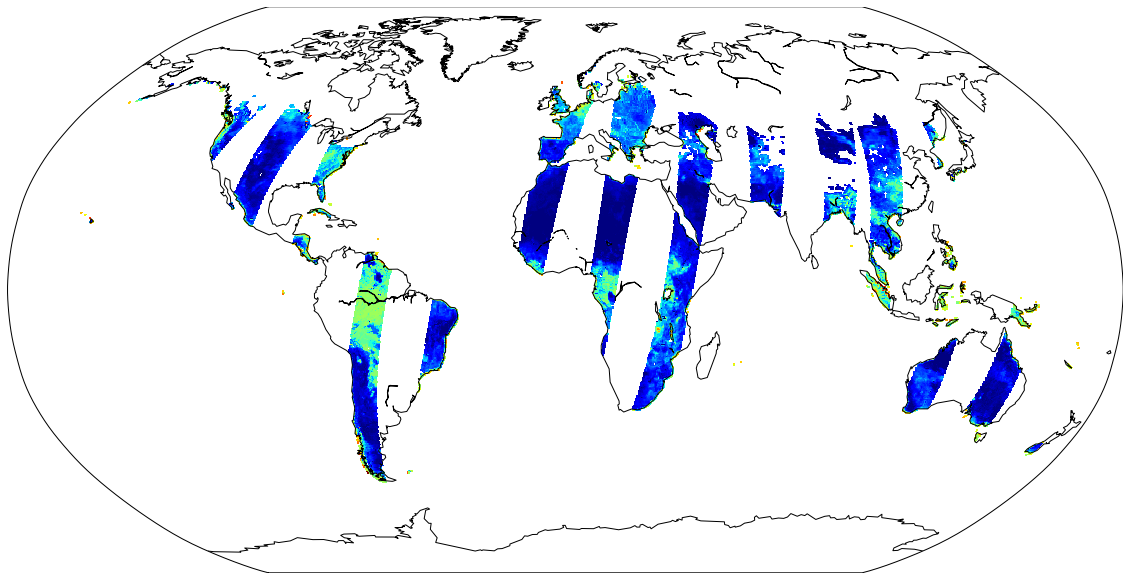

In [5]:
%matplotlib inline
@interact(timestamp=widgets.IntSlider(min=1427846400, max=1464652800, step=86400, value=0, continuous_update=False, description="Date", readout_format="d"))
def find_datasets(timestamp=1427846400):
        single_date = datetime.fromtimestamp(timestamp)
        formed_url = SMAP_DATASET_URL + form_dotted_date(single_date) + SMAP_DATEFILE_URL.format(form_smashed_date(single_date)) + VARIABLES
        plt.clf()
        plt.text(105,105,"Loading...")
        try:
            file, headers = urllib.request.urlretrieve(formed_url)
            dataset = netCDF4.Dataset(file)
            plt.clf()
            show_covered_area(dataset)
        except HTTPError as e:
            print("There was an error:" + str(e.code))
        
        
find_datasets()